# Output Spectra

In [1]:
import pathlib
import pandas as pd
from scipy.signal import medfilt

import matplotlib.pyplot as plt

In [2]:
basedir = pathlib.Path('~/pyird/data/20210317/').expanduser()
anadir = basedir/'reduc/'

fitsid_target = [41510]
band = "h"
mmf = "mmf2"
if band=="h" and fitsid_target[0]%2==0:
    fitsid_target = [x+1 for x in fitsid_target]

readargs = {"header": None, "sep": "\s+"}
names = ["wavelength [nm]", "order", "counts", "sn_ratio", "uncertainty"]

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/sb/rxwbk6kd4gldqpdvzxnhq4xm0000gn/T/ipykernel_1300/3404868316.py:10: SyntaxWarning: invalid escape sequence '\s'
  readargs = {"header": None, "sep": "\s+"}


The figure shows the target spectra extracted using `PyIRD`. 

- The sample dataset corresponds to the brown dwarf G196-3B.
- The emission-like signals observed in the spectra are likely due to sky (airglow) emissions or hotpixels that were not masked.

- The normalized spectrum (nw) is obtained by dividing the extracted spectrum (w) by the blaze function (`wblaze_?_m?.dat`).
- The order-combined spectrum (ncw) demonstrates an improved S/N in the wavelength region where adjacent orders overlap.

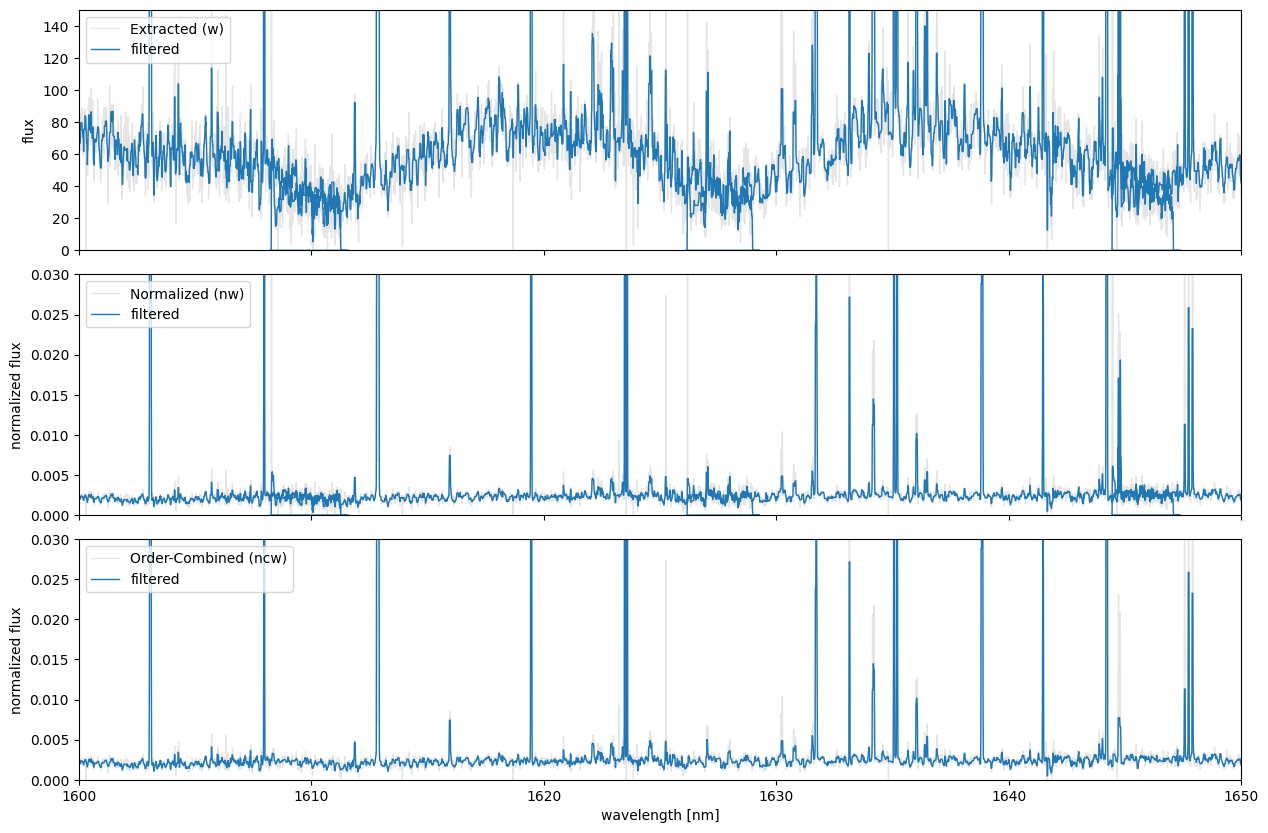

In [3]:
for fitsid in fitsid_target:
    # Extracted Spectrum: 
    # $1: wavelength [nm], $2: order, $3: counts
    wfile_path = anadir / f"w{fitsid}_{mmf[0]}{mmf[-1]}.dat"
    wspec = pd.read_csv(wfile_path, names = names[:3], **readargs)

    # Normalized Spectrum: 
    # $1: wavelength [nm], $2: order, $3: counts, $4: sn_ratio, $5: uncertainty
    nwfile_path = anadir / f"nw{fitsid}_{mmf[0]}{mmf[-1]}.dat"
    nwspec = pd.read_csv(nwfile_path, names = names, **readargs)

    # Order-combined Spectrum
    # $1: wavelength [nm], $2: counts, $3: sn_ratio, $4: uncertainty
    ncwfile_path = anadir / f"ncw{fitsid}_{mmf[0]}{mmf[-1]}.dat"
    names_ncw = [x for i, x in enumerate(names) if i != 1]
    ncwspec = pd.read_csv(ncwfile_path, names = names_ncw, **readargs)

    # Plot
    fig, axs = plt.subplots(3, 1, figsize=(15,10), sharex=True)
    plt.subplots_adjust(hspace=0.1)
    labels = ["Extracted (w)", "Normalized (nw)", "Order-Combined (ncw)"]
    for i, spec in enumerate([wspec, nwspec, ncwspec]):
        axs[i].plot(spec["wavelength [nm]"], spec["counts"], lw=1, color="grey", alpha=0.2, label=labels[i])
        axs[i].plot(spec["wavelength [nm]"], medfilt(spec["counts"], 5), lw=1, label="filtered")

    for ax in axs:
        ax.legend(loc="upper left")
    axs[0].set(xlim=(1600, 1650),#(wspec["wavelength [nm]"].min(),wspec["wavelength [nm]"].max()), 
               ylim=(0, 150),
               ylabel="flux")
    axs[1].set(ylim=(0,0.03),
               ylabel="normalized flux")
    axs[2].set(ylim=(0,0.03),
               xlabel="wavelength [nm]",
               ylabel="normalized flux")
    plt.show()